# Named Entity Recognition (NER) Analysis

This notebook extracts and analyzes named entities from the news articles. 
We focus on identifying:
- **People** (Leaders, celebrities)
- **Organizations** (Companies, parties)
- **Locations** (Countries, cities)

## Objectives:
1.  Identify the most mentioned person today.
2.  Identify top companies mentioned in business news.
3.  Visualize top entities and their frequencies.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from collections import Counter

# Set style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Load Spacy Model
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("Downloading 'en_core_web_sm' model...")
    from spacy.cli import download
    download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")

print("Spacy model loaded successfully.")

Spacy model loaded successfully.


In [3]:
# Load Data
try:
    df = pd.read_csv('fetch_data_with_chunking.csv')
except FileNotFoundError:
    df = pd.read_csv('Fetch_data_new/fetch_data_with_chunking.csv')

# Ensure text columns are strings
df['headline'] = df['headline'].astype(str)
df['content'] = df['content'].astype(str)
df['full_text'] = df['headline'] + ". " + df['content']

print(f"Loaded {len(df)} articles.")

Loaded 15 articles.


In [4]:
# NER Extraction Function
def extract_entities(text):
    doc = nlp(text)
    people = []
    orgs = []
    locs = []
    
    for ent in doc.ents:
        # Clean entity text (remove possessives like "'s")
        clean_text = ent.text.replace("'s", "").strip()
        if len(clean_text) > 1:  # Ignore single characters
            if ent.label_ == "PERSON":
                people.append(clean_text)
            elif ent.label_ == "ORG":
                orgs.append(clean_text)
            elif ent.label_ in ["GPE", "LOC"]:
                locs.append(clean_text)
    return people, orgs, locs

# Apply Extraction
df['People'], df['Orgs'], df['Locations'] = zip(*df['full_text'].apply(extract_entities))

df[['headline', 'People', 'Orgs', 'Locations']].head()

,headline,People,Orgs,Locations
0,The right to disconnect in an ‘always-on’ econ...,"[Anna Sebastian Perayil, Bill, Bill, Lok Sabha...","[the International Labour Organization (ILO, E...","[India, India, India, India, India, India, Fra..."
1,The perfect flaw: how a diamond defect is chan...,"[Kae Nemoto, Jörg Schmiedmayer, TU Wien, linkE...","[NV, NV, NV, NV, NV, NV, NV, Okinawa Institute...","[jewellery, Austria, Japan, India]"
2,BCCI vs BCB: Cricket is collateral damage in a...,"[Mustafizur Rahman, Rukh Khan, Mustafizur, Kha...","[BCCI, BCB, the Board of Control for Cricket, ...","[India, Bangladesh, Bangladesh, Bangladesh, Be..."
3,Where health stands as the year beginsPremium,"[Zudeda Hamidwrites, Shajan Perappadan, Sharad...","[Health Matters, the Health Ministry, theClini...","[AI, AI, India, India, the United States, Indi..."
4,"When eggs, stones were hurled at T.N. Governor...","[Tamil Nadu, the Raj Bhavan, Lok Bhavan, Pondi...","[T.N., CM, AIADMK, S.S. Panneerselvam, Villupu...","[Tindivanam, Vijayakumar, T.N.Report, Tindivan..."


## 1. Top Entities Analysis

In [5]:
# Aggregate all entities
all_people = [person for sublist in df['People'] for person in sublist]
all_orgs = [org for sublist in df['Orgs'] for org in sublist]
all_locs = [loc for sublist in df['Locations'] for loc in sublist]

person_counts = Counter(all_people)
org_counts = Counter(all_orgs)
loc_counts = Counter(all_locs)

print("Top 5 People:", person_counts.most_common(5))
print("Top 5 Organizations:", org_counts.most_common(5))
print("Top 5 Locations:", loc_counts.most_common(5))

Top 5 People: [('linkEmailFacebookTwitterTelegramLinkedInWhatsAppRedditREAD LATERSEE', 15), ('Trump', 13), ('Bill', 11), ('Maduro', 6), ('Jayalalithaa', 5)]
Top 5 Organizations: [('BJP', 14), ('Congress', 11), ('BCB', 10), ('State', 8), ('NV', 8)]
Top 5 Locations: [('India', 44), ('Venezuela', 22), ('U.S.', 14), ('Bangladesh', 13), ('Iran', 12)]


## 2. Specific Use Cases

In [6]:
# Use Case 1: Most Mentioned Person
if person_counts:
    most_mentioned_person = person_counts.most_common(1)[0]
    print(f"\nMost Mentioned Person Today: {most_mentioned_person[0]} ({most_mentioned_person[1]} mentions)")
else:
    print("No people identified.")

# Use Case 2: Top Companies in Business News
# Identify business articles (simple keyword filter if 'Mapped_Category' isn't available from previous step)
business_keywords = ['business', 'economy', 'market', 'finance', 'stock', 'trade']
business_df = df[df['full_text'].str.contains('|'.join(business_keywords), case=False, na=False)]

business_orgs = [org for sublist in business_df['Orgs'] for org in sublist]
business_org_counts = Counter(business_orgs)

print(f"\nTop 5 Organizations in Business Context:")
for org, count in business_org_counts.most_common(5):
    print(f"- {org}: {count}")


Most Mentioned Person Today: linkEmailFacebookTwitterTelegramLinkedInWhatsAppRedditREAD LATERSEE (15 mentions)

Top 5 Organizations in Business Context:
- Amaravati: 5
- State: 4
- Parliament: 4
- YSRCP: 4
- Working Conditions Code: 2


## 3. Visualizations

C:\Users\abhis\AppData\Local\Temp\ipykernel_36724\2692546540.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(values), y=list(labels), ax=ax, palette=color)
C:\Users\abhis\AppData\Local\Temp\ipykernel_36724\2692546540.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(values), y=list(labels), ax=ax, palette=color)
C:\Users\abhis\AppData\Local\Temp\ipykernel_36724\2692546540.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(values), y=list(labels), ax=ax, palette=color)


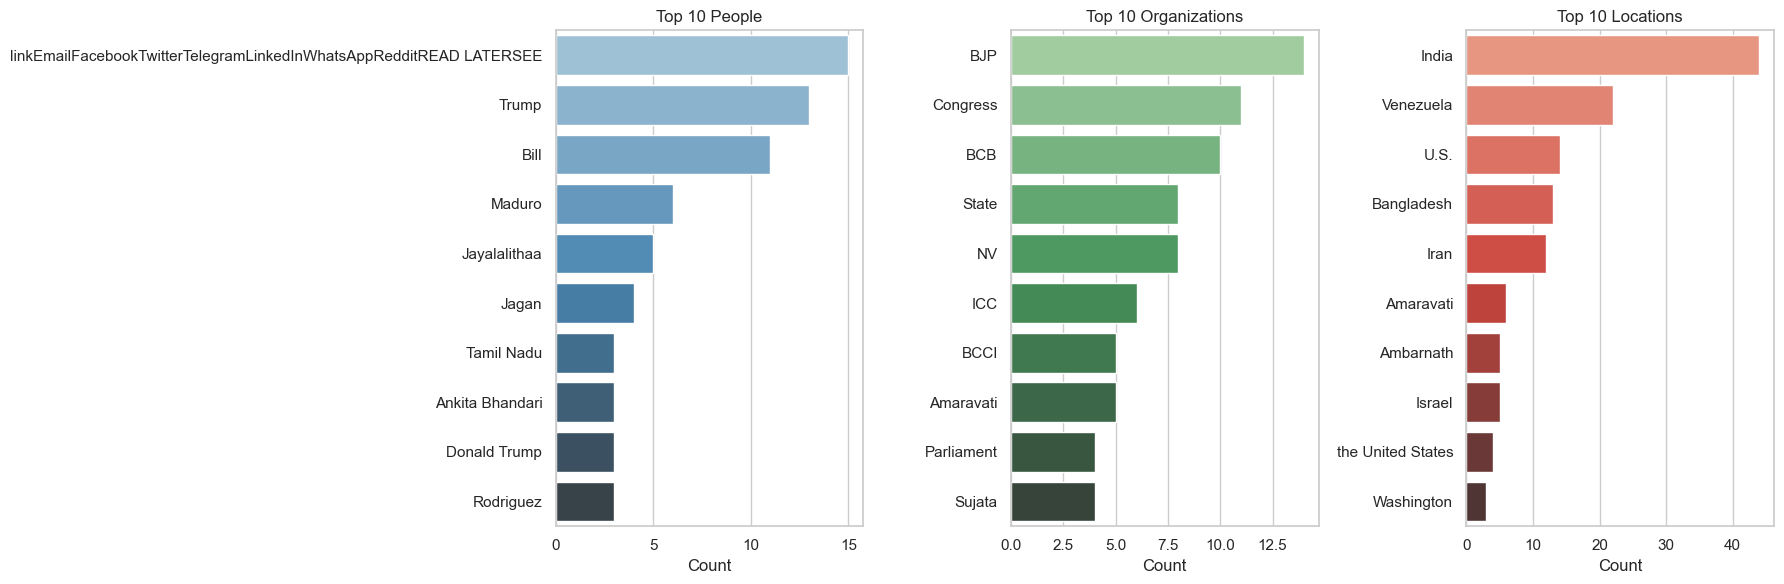

In [7]:
def plot_top_entities(counts, title, ax, color):
    if not counts:
        ax.text(0.5, 0.5, 'No Data', ha='center', va='center')
        ax.set_title(title)
        return
        
    common = counts.most_common(10)
    labels, values = zip(*common)
    
    sns.barplot(x=list(values), y=list(labels), ax=ax, palette=color)
    ax.set_title(title)
    ax.set_xlabel('Count')

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

plot_top_entities(person_counts, 'Top 10 People', axes[0], 'Blues_d')
plot_top_entities(org_counts, 'Top 10 Organizations', axes[1], 'Greens_d')
plot_top_entities(loc_counts, 'Top 10 Locations', axes[2], 'Reds_d')

plt.tight_layout()
plt.show()

## 4. Entity Frequency Table
A unified table showing the top entities across valid types.

In [8]:
# Create dataframes for display
top_people = pd.DataFrame(person_counts.most_common(10), columns=['Person', 'Count'])
top_orgs = pd.DataFrame(org_counts.most_common(10), columns=['Organization', 'Count'])
top_locs = pd.DataFrame(loc_counts.most_common(10), columns=['Location', 'Count'])

# Display side-by-side (simulated by printing)
print("--- Top People ---")
display(top_people)
print("\n--- Top Organizations ---")
display(top_orgs)
print("\n--- Top Locations ---")
display(top_locs)

--- Top People ---


,Person,Count
0,linkEmailFacebookTwitterTelegramLinkedInWhatsA...,15
1,Trump,13
2,Bill,11
3,Maduro,6
4,Jayalalithaa,5
5,Jagan,4
6,Tamil Nadu,3
7,Ankita Bhandari,3
8,Donald Trump,3
9,Rodriguez,3



--- Top Organizations ---


,Organization,Count
0,BJP,14
1,Congress,11
2,BCB,10
3,State,8
4,NV,8
5,ICC,6
6,BCCI,5
7,Amaravati,5
8,Parliament,4
9,Sujata,4



--- Top Locations ---


,Location,Count
0,India,44
1,Venezuela,22
2,U.S.,14
3,Bangladesh,13
4,Iran,12
5,Amaravati,6
6,Ambarnath,5
7,Israel,5
8,the United States,4
9,Washington,3
